In [1]:
import cv2
import math
import numpy as np
import sys
import matplotlib.pyplot as plt

In [2]:
def apply_mask(matrix, mask, fill_value):
    masked = np.ma.array(matrix, mask=mask, fill_value=fill_value)
    return masked.filled()

In [3]:
def apply_threshold(matrix, low_value, high_value):
    low_mask = matrix < low_value
    matrix = apply_mask(matrix, low_mask, low_value)

    high_mask = matrix > high_value
    matrix = apply_mask(matrix, high_mask, high_value)

    return matrix

In [25]:
def simplest_cb(img, percent):
    assert img.shape[2] == 3
    assert percent > 0 and percent < 100

    half_percent = percent / 2000.0

    channels = cv2.split(img)

    out_channels = []
    for channel in channels:
        assert len(channel.shape) == 2
        # find the low and high precentile values (based on the input percentile)
        height, width = channel.shape
        vec_size = width * height
        flat = channel.reshape(vec_size)

        assert len(flat.shape) == 1

        flat = np.sort(flat)

        n_cols = flat.shape[0]
        print(flat.shape)
        print(n_cols)

        low_val  = flat[math.floor(n_cols * half_percent)]
        high_val = flat[math.ceil( n_cols * (1.0 - half_percent))]

        print ("Lowval: ", low_val)
        print ("Highval: ", high_val)

        # saturate below the low percentile and above the high percentile
        thresholded = apply_threshold(channel, low_val, high_val)
        # scale the channel
        normalized = cv2.normalize(thresholded, thresholded.copy(), 0, 255, cv2.NORM_MINMAX)
        out_channels.append(normalized)

    return cv2.merge(out_channels)

In [5]:
img = cv2.imread('Zurich-RAW-to-DSLR-Dataset/full_resolution/huawei_visualized/691.png')
out = simplest_cb(img, 1)
RGB_src = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
RGB_out = cv2.cvtColor(out, cv2.COLOR_BGR2RGB)
#canny = cv2.Canny(img, 100,200)


(11808768,)
11808768
Lowval:  26
Highval:  211
(11808768,)
11808768
Lowval:  25
Highval:  203
(11808768,)
11808768
Lowval:  20
Highval:  209


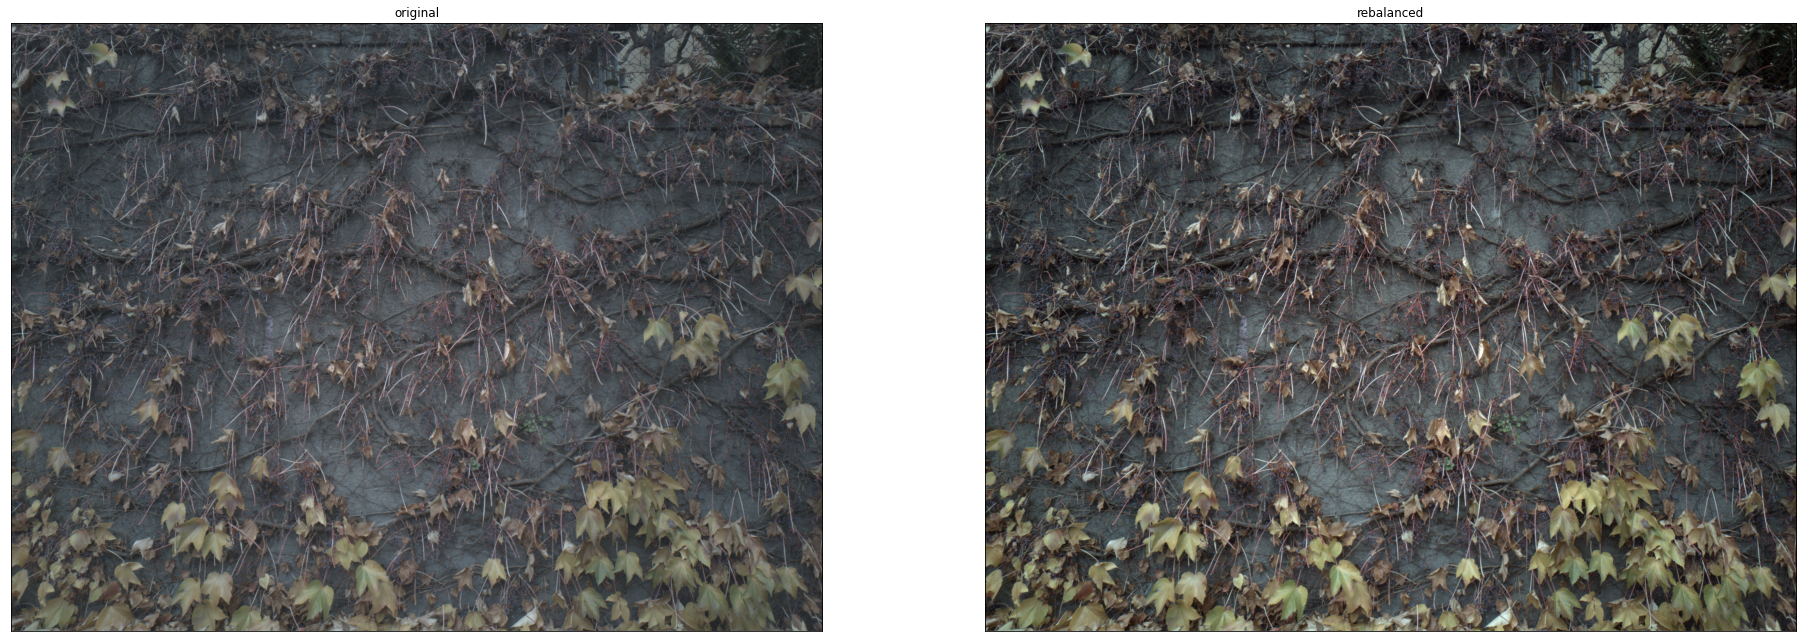

In [6]:
plt.figure(figsize=(32,16))
plt.subplot(121),  plt.imshow(RGB_src)
plt.title("original"), plt.xticks([]), plt.yticks([])
plt.subplot(122),
plt.imshow(RGB_out)
plt.title("rebalanced"), plt.xticks([]), plt.yticks([])

  
plt.show()

In [7]:
#plt.imshow(RGB_reference)

In [8]:
#plt.imshow(canny, 'gray')

In [21]:
img = cv2.imread('archive/natural_images/airplane/airplane_0006.jpg')
#reference = cv2.imread('Zurich-RAW-to-DSLR-Dataset/full_resolution/huawei_isp/691.jpg') 
out = simplest_cb(img, 1)
RGB_src = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
RGB_out = cv2.cvtColor(out, cv2.COLOR_BGR2RGB)
#canny = cv2.Canny(img, 200,400)
#RGB_reference = cv2.cvtColor(reference, cv2.COLOR_BGR2RGB)

(28615,)
28615
Lowval:  0
Highval:  238
(28615,)
28615
Lowval:  0
Highval:  241
(28615,)
28615
Lowval:  17
Highval:  255


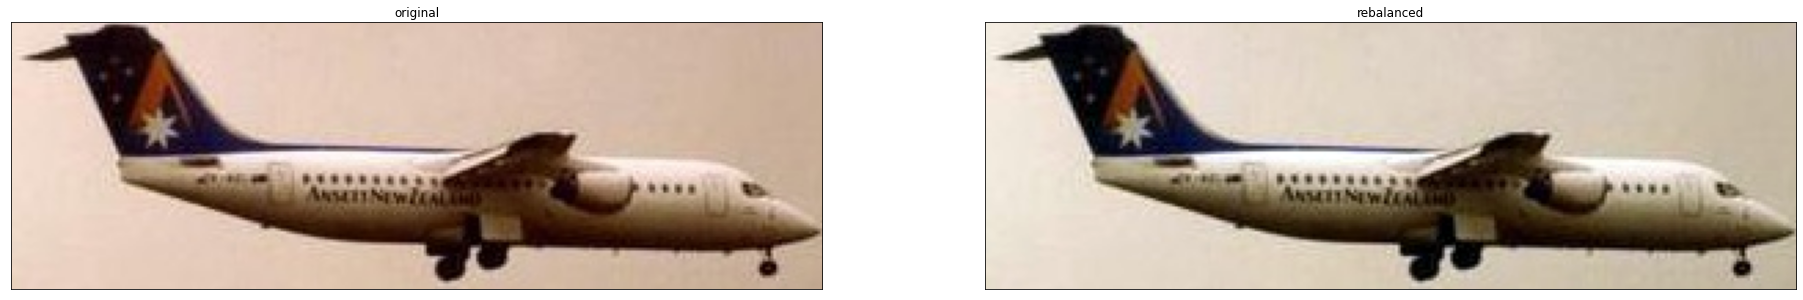

In [22]:
#plt.imshow(RGB_src)

#RGB_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(32,16))
plt.subplot(121),  plt.imshow(RGB_src)
plt.title("original"), plt.xticks([]), plt.yticks([])
plt.subplot(122),
plt.imshow(RGB_out)
plt.title("rebalanced"), plt.xticks([]), plt.yticks([])

  
plt.show()

In [11]:
#plt.imshow(canny, 'gray')

In [12]:
img = cv2.imread('landscape/00000002.jpg')
#reference = cv2.imread('Zurich-RAW-to-DSLR-Dataset/full_resolution/huawei_isp/691.jpg') 
out = simplest_cb(img, 1)
RGB_src = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
RGB_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
RGB_out = cv2.cvtColor(out, cv2.COLOR_BGR2RGB)
#canny = cv2.Canny(img, 250,500)
#canny2 = cv2.cvtColor(canny, cv2.COLOR_BGR2RGB)
#RGB_reference = cv2.cvtColor(reference, cv2.COLOR_BGR2RGB)

(640000,)
640000
Lowval:  0
Highval:  255
(640000,)
640000
Lowval:  0
Highval:  255
(640000,)
640000
Lowval:  0
Highval:  255


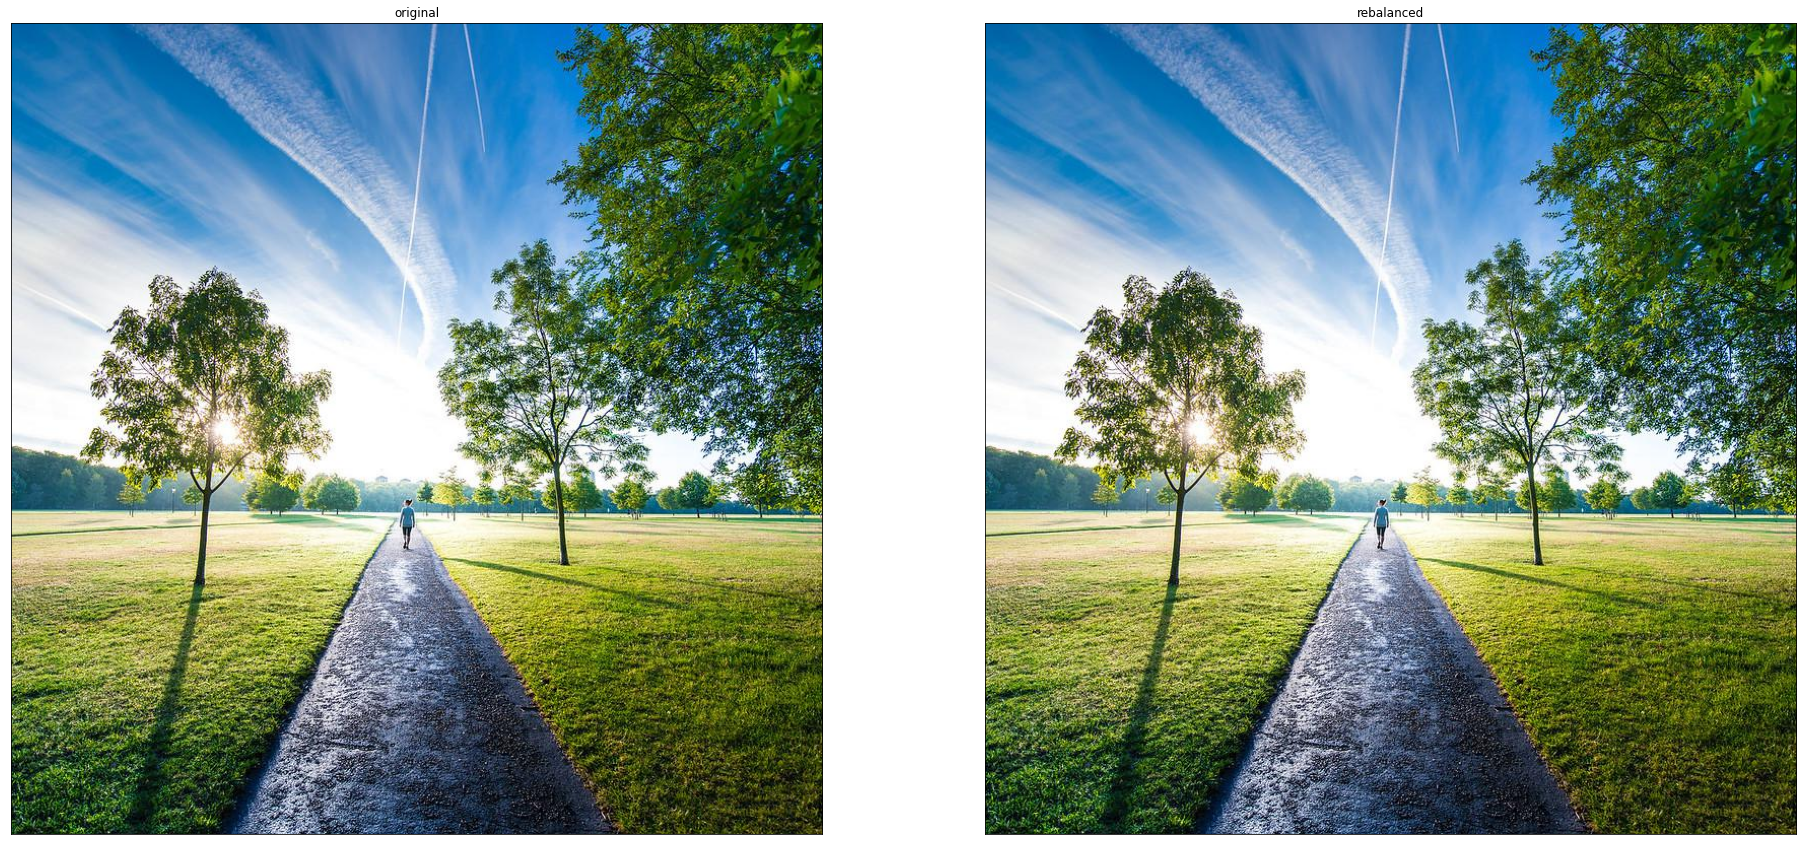

In [13]:
plt.figure(figsize=(32,16))
plt.subplot(121),  plt.imshow(RGB_src)
plt.title("original"), plt.xticks([]), plt.yticks([])
plt.subplot(122),
plt.imshow(RGB_out)
plt.title("rebalanced"), plt.xticks([]), plt.yticks([])

  
plt.show()

In [14]:
#plt.imshow(canny, 'gray')

In [26]:
img = cv2.imread('archive/natural_images/flower/flower_0337.jpg')
#reference = cv2.imread('Zurich-RAW-to-DSLR-Dataset/full_resolution/huawei_isp/691.jpg') 
out = simplest_cb(img, 1)
RGB_src = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
RGB_out = cv2.cvtColor(out, cv2.COLOR_BGR2RGB)

(262665,)
262665
Lowval:  0
Highval:  167
(262665,)
262665
Lowval:  0
Highval:  158
(262665,)
262665
Lowval:  3
Highval:  255


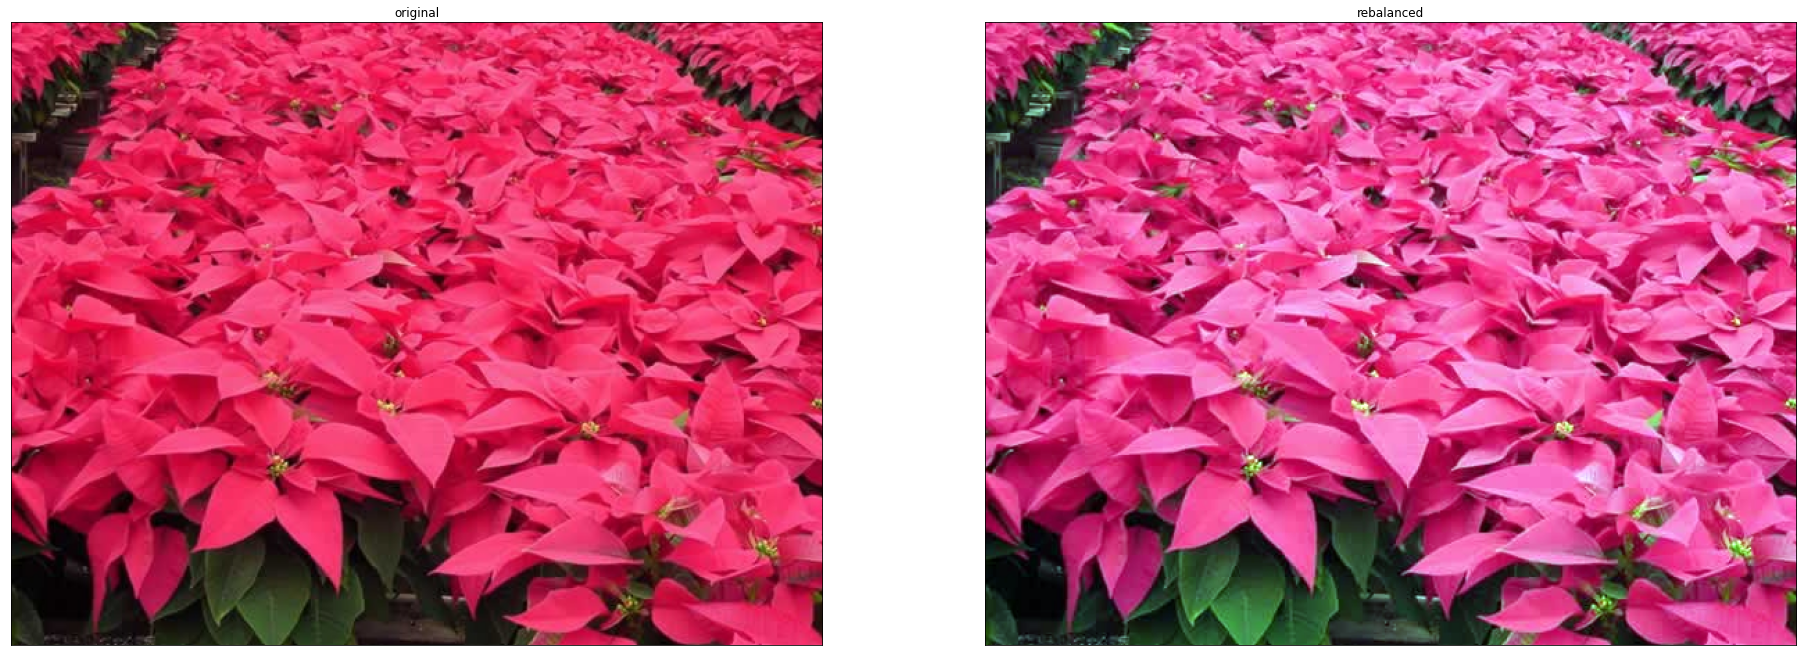

In [27]:
plt.figure(figsize=(32,16))
plt.subplot(121),  plt.imshow(RGB_src)
plt.title("original"), plt.xticks([]), plt.yticks([])
plt.subplot(122),
plt.imshow(RGB_out)
plt.title("rebalanced"), plt.xticks([]), plt.yticks([])

  
plt.show()

In [17]:
lists=[]
channels = cv2.split(img)
for channel in channels:
    height, width = channel.shape
    vec_size = width * height
    flat = channel.reshape(vec_size)
    lists.append(flat)
    

In [18]:
sums=[]
averages=[]
for list in lists:
    sums.append(np.sum(list))
for sum in sums:
    height, width = channel.shape
    vec_size = width * height
    averages.append(sum/vec_size)

In [19]:
averages

[83.25971103877562, 42.859676774598825, 192.43842537071936]